In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [3]:
sql = """
SELECT a.LINE_NAME, a.STATION_NAME, a.OLD_ADDRESS, d.est_date
from METRO_ADDRESS a
left join (SELECT * FROM METRO_DATE WHERE LINE_NAME like "%9%") d
on a.station_name = d.station_name
WHERE a.line_name like "%9%" 
"""

cursor.execute(sql)
result = cursor.fetchall()

line_9 = pd.DataFrame(result)
line_9.columns = [desc[0] for desc in cursor.description]
line_9.head()

,LINE_NAME,STATION_NAME,OLD_ADDRESS,EST_DATE
0,9호선,개화,서울특별시 강서구 개화동 493-2,2009-07-22
1,9호선,김포공항,서울특별시 강서구 방화동 886,2007-06-30
2,9호선,공항시장,서울특별시 강서구 공항동 산 20-2,2009-07-22
3,9호선,신방화,서울특별시 강서구 방화동 217-156,2009-07-24
4,9호선,마곡나루,서울특별시 강서구 마곡동 367-6,2009-07-22


In [4]:
sql = """
SELECT * FROM DONG_PRICE_YEARLY 
"""

cursor.execute(sql)
result = cursor.fetchall()

dong_year = pd.DataFrame(result)
dong_year.columns = [desc[0] for desc in cursor.description]
dong_year.head()

,gu,dong,year,price
0,강남구,개포동,2024,2206522000
1,강남구,개포동,2023,1871364102
2,강남구,개포동,2022,2130712121
3,강남구,개포동,2021,2105346303
4,강남구,개포동,2020,1780246013


In [6]:
capital_sql = """SELECT * from APARTMENT_AVG_PRICE_CATEGORY_MONTHLY WHERE CATEGORY = '수도권'"""

cursor.execute(capital_sql)
result = cursor.fetchall()

capital_area = pd.DataFrame(result)
capital_area.columns = [desc[0] for desc in cursor.description]
capital_area.head()

,YEAR,MONTH,CATEGORY,PRICE
0,2014,1,수도권,336244000
1,2014,2,수도권,337285000
2,2014,3,수도권,338751000
3,2014,4,수도권,338822000
4,2014,5,수도권,338573000


In [7]:
remote.close()

In [8]:
import re

In [13]:
line_9["OLD_ADDRESS"][0].split(" ")

['서울특별시', '강서구', '개화동', '493-2']

In [14]:
gu_list = []
dong_list = []
for i, row in line_9.iterrows():
    gu = row["OLD_ADDRESS"].split(" ")[1]
    dong = row["OLD_ADDRESS"].split(" ")[2]

    gu_list.append(gu)
    dong_list.append(dong)

line_9["GU"] = gu_list
line_9["DONG"] = dong_list

In [27]:
line_9.replace("삼전동180-8", "삼전동", inplace=True)

In [32]:
line9_list = line_9["DONG"].unique()

In [30]:
dong_year[dong_year["dong"] == "양평동5가"]

,gu,dong,year,price


In [31]:
line_9.sort_values(by="EST_DATE")

,LINE_NAME,STATION_NAME,OLD_ADDRESS,EST_DATE,GU,DONG
1,9호선,김포공항,서울특별시 강서구 방화동 886,2007-06-30,강서구,방화동
0,9호선,개화,서울특별시 강서구 개화동 493-2,2009-07-22,강서구,개화동
24,9호선,신논현,서울특별시 강남구 역삼동 800,2009-07-22,강남구,역삼동
23,9호선,사평,서울특별시 서초구 반포동 128-7,2009-07-22,서초구,반포동
22,9호선,고속터미널,서울특별시 서초구 반포동 19-11,2009-07-22,서초구,반포동
21,9호선,신반포,서울특별시 서초구 반포동 128-1,2009-07-22,서초구,반포동
20,9호선,구반포,서울특별시 서초구 반포동 817,2009-07-22,서초구,반포동
19,9호선,동작(현충원),서울특별시 동작구 동작동 326,2009-07-22,동작구,동작동
18,9호선,흑석(중앙대입구,서울특별시 동작구 흑석동 4,2009-07-22,동작구,흑석동
17,9호선,노들,서울특별시 동작구 본동 344-10,2009-07-22,동작구,본동


In [35]:
def new(data):
    if data["dong"] in line9_list:
        est = "neuf"
    else:
        est = "non"
    return est

In [36]:
dong_year["LINE9"] = dong_year.apply(new, axis =1)

In [37]:
dong_year.tail()

,gu,dong,year,price,LINE9
2828,영등포구,양평동1가,2018,476793650,non
2829,영등포구,양평동1가,2017,399294642,non
2830,영등포구,양평동1가,2016,352390243,non
2831,영등포구,양평동1가,2015,343550000,non
2832,영등포구,양평동1가,2014,301008928,non


In [39]:
dong_year["year"].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014,
       2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005])

In [40]:
df = pd.pivot_table(data= dong_year, index= ["year"], columns="LINE9", values="price", aggfunc="mean")
df.style.format(thousands=',')

LINE9,neuf,non
year,,
2005,"121,500,000.000000",nan
2006,"365,817,039.200000","335,748,917.836364"
2007,"333,188,861.900000","350,231,488.946429"
2008,"384,884,528.700000","401,180,163.109091"
2009,"471,153,822.800000","436,537,684.392857"
2010,"452,557,123.000000","432,057,673.578947"
2011,"456,895,420.500000","434,398,145.644068"
2012,"456,403,308.500000","408,911,396.915254"
2013,"473,988,625.700000","405,692,651.593220"


In [41]:
fmt = lambda x: '{:.2f}억'.format(x/(10**8))
df.style.format(formatter={'neuf':fmt, 'non':fmt})

LINE9,neuf,non
year,,
2005,1.22억,nan억
2006,3.66억,3.36억
2007,3.33억,3.50억
2008,3.85억,4.01억
2009,4.71억,4.37억
2010,4.53억,4.32억
2011,4.57억,4.34억
2012,4.56억,4.09억
2013,4.74억,4.06억


In [42]:
df['NINE'] = df['neuf'].rolling(window=2).apply(lambda x: ((x.iloc[1]-x.iloc[0])/x.iloc[0]))
df['NO'] = df['non'].rolling(window=2).apply(lambda x: ((x.iloc[1]-x.iloc[0])/x.iloc[0]))

In [43]:
fmt = lambda x: '{:.2f}억'.format(x/(10**8))
fmt_per = lambda x: '{:.2f}%'.format(x * 100)
df.style.format(formatter={'neuf':fmt, 'non':fmt, 'NINE':fmt_per, 'NO':fmt_per})

LINE9,neuf,non,NINE,NO
year,,,,
2005,1.22억,nan억,nan%,nan%
2006,3.66억,3.36억,201.08%,nan%
2007,3.33억,3.50억,-8.92%,4.31%
2008,3.85억,4.01억,15.52%,14.55%
2009,4.71억,4.37억,22.41%,8.81%
2010,4.53억,4.32억,-3.95%,-1.03%
2011,4.57억,4.34억,0.96%,0.54%
2012,4.56억,4.09억,-0.11%,-5.87%
2013,4.74억,4.06억,3.85%,-0.79%


In [49]:
df.fillna(0, inplace=True)

In [44]:
capital_year = capital_area[capital_area["MONTH"] == 1]

In [60]:
df.index

Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype='int64', name='year')

In [58]:
year_list = df.index[2:]

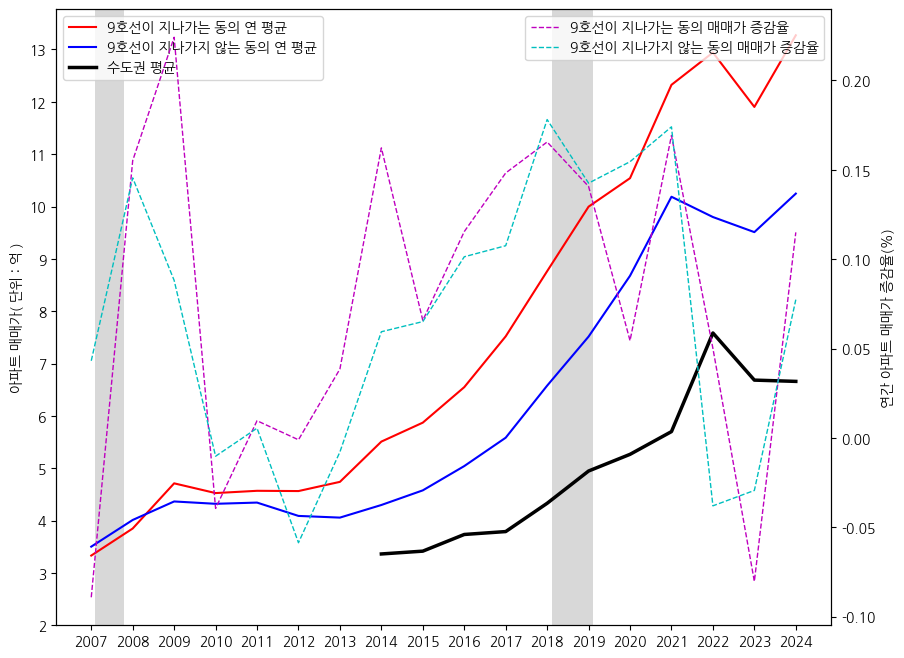

In [63]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot()

ax1.plot(year_list, df["neuf"][2:], "r-", label = "9호선이 지나가는 동의 연 평균", lw=1.5)
ax1.plot(year_list, df["non"][2:], "b-", label = "9호선이 지나가지 않는 동의 연 평균", lw=1.5)
ax1.plot(capital_year["YEAR"], capital_year["PRICE"], "k", label = "수도권 평균", lw=2.5)

ax1.set_ylabel("아파트 매매가( 단위 : 억 )")
eoook = 14
ax1.set_yticks(range(200000000, 100000000 * eoook, 100000000))
ax1.set_yticklabels(range(2, eoook))

ax1.set_xticks(df.index)

ax1.tick_params(axis="y")
ax1.legend(loc=2)

ax1.axvspan(2007.8, 2007.10, facecolor='gray', alpha=0.3)
ax1.axvspan(2018.11, 2019.1, facecolor='gray', alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(year_list, df["NINE"][2:], "m--", label = "9호선이 지나가는 동의 매매가 증감율", lw=1)
ax2.plot(year_list, df["NO"][2:], "c--", label = "9호선이 지나가지 않는 동의 매매가 증감율", lw=1)

ax2.set_ylabel("연간 아파트 매매가 증감율(%)")

# y_tick = np.arange(-0.1, 0.3, 10)
# ax2.set_yticks(y_tick)
# ax2.set_yticklabels([f'{x * 100:.0f}%' for x in y_tick])
ax2.tick_params(axis="y")
ax2.legend(loc=1)

plt.show()